In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_excel("ventas_cat.xlsx")
df

,fecha,producto,cantidad,total,vendedor,categorizacion
0,2025-05-15,Refill de 20 Litros Suavizante Fresco Amanecer,11,1155.0,Lusvin Samayoa,Suavizante
1,2025-05-14,Refill de 20 Litros Suavizante Fresco Amanecer,1,105.0,Lusvin Samayoa,Suavizante
2,2025-04-05,Refill de 20 Litros Suavizante Fresco Amanecer,1,105.0,Lusvin Samayoa,Suavizante
3,2025-05-14,Refill de 20 Litros de Suavizante Floral,1,105.0,Lusvin Samayoa,Suavizante
4,2025-05-14,Refill de 20 Litros de Suavizante Floral,9,1080.0,Lusvin Samayoa,Suavizante
...,...,...,...,...,...,...
1804,2021-06-10,Lavadora carga superior 53Lb,1,2300.0,Lusvin Samayoa,Lavadora
1805,2021-06-09,Refrigeradora 18 pies,1,4300.0,Katheryn Celeste Rosales Monzon,Refrigeradora
1806,2021-06-09,Ecofiltro,1,250.0,Lesly Yasmin Gabriela Ramos,Cocina
1807,2021-06-09,"Televisor LED 32""",1,2432.0,Lusvin Samayoa,TV


In [21]:
top10 = (df.groupby("categorizacion")["total"]
.sum()
.sort_values(ascending=False)
.head(10)
.reset_index()
        )
print(top10)

  categorizacion          total
0             TV  309597.650000
1       Prestamo  280607.921574
2  Refrigeradora  231977.280000
3           Cama  213821.316667
4       Lavadora  176715.500000
5        Celular  164618.524000
6     Componente   78531.500000
7           Moto   70232.000000
8         Estufa   65929.100000
9             PC   64726.500000


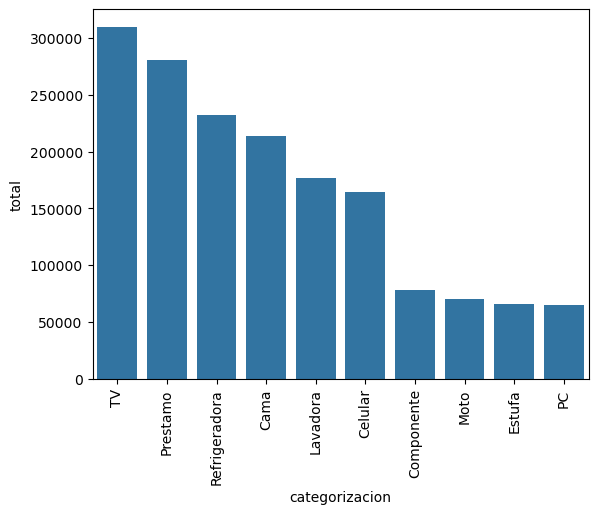

In [22]:
sns.barplot(data=top10, x="categorizacion", y="total")
plt.xticks(rotation=90)
plt.show()

In [23]:
df_year = df[df["fecha"].dt.year == 2025]
df_year['mes'] = df_year['fecha'].dt.to_period('M')
tendencia = df_year.groupby(['mes', 'categorizacion'])['total'].sum().unstack()

C:\Users\ckicu\AppData\Local\Temp\ipykernel_17912\3441106749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['mes'] = df_year['fecha'].dt.to_period('M')


C:\Users\ckicu\AppData\Local\Temp\ipykernel_17912\3716948577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['mes'] = df_top['fecha'].dt.to_period('M')


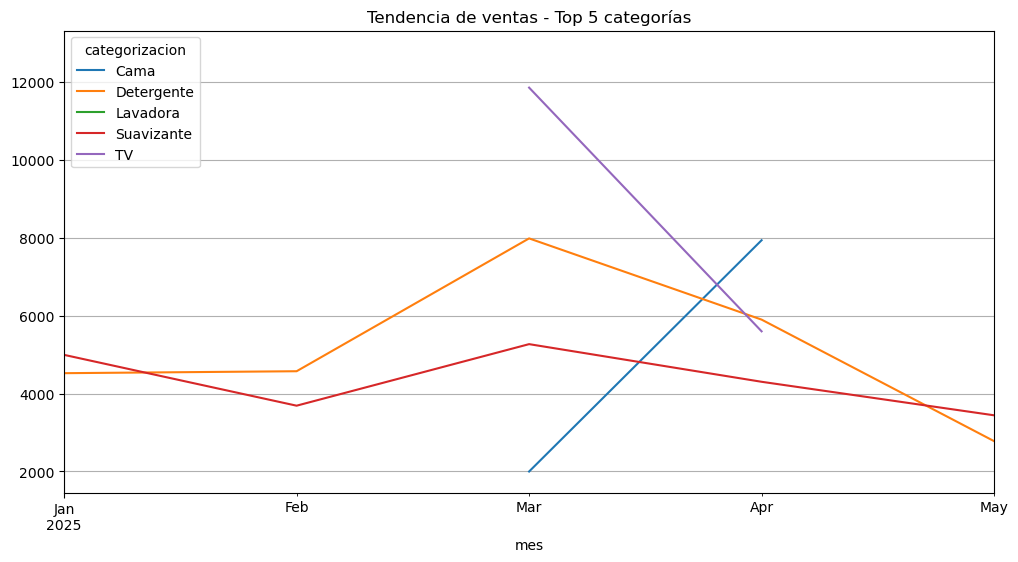

In [36]:
# Tendencia de ventas por categoria

top_categorias = df_year.groupby('categorizacion')['total'].sum().nlargest(5).index

df_top = df_year[df_year['categorizacion'].isin(top_categorias)]
df_top['mes'] = df_top['fecha'].dt.to_period('M')

tendencia = df_top.groupby(['mes', 'categorizacion'])['total'].sum().unstack()

tendencia.plot(figsize=(12,6))
plt.title('Tendencia de ventas - Top 5 categorías')
plt.grid(True)
plt.show()

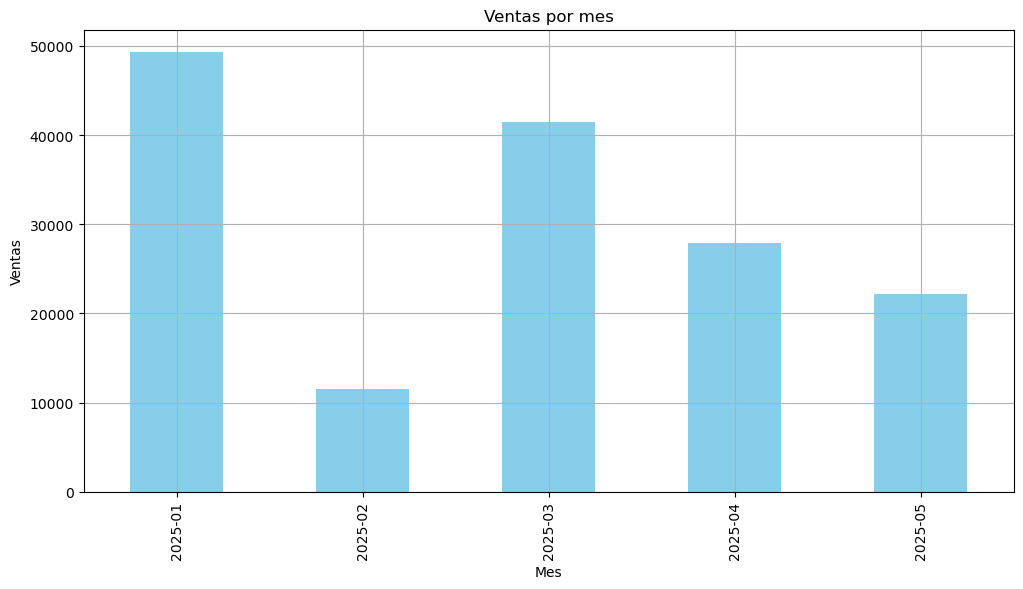

In [27]:
# Estacionalidad
ventas_mensuales = df_year.groupby(df_year['fecha'].dt.to_period('M'))['total'].sum()

ventas_mensuales.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

C:\Users\ckicu\AppData\Local\Temp\ipykernel_17912\2098190474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['semana'] = df_year['fecha'].dt.to_period('W')


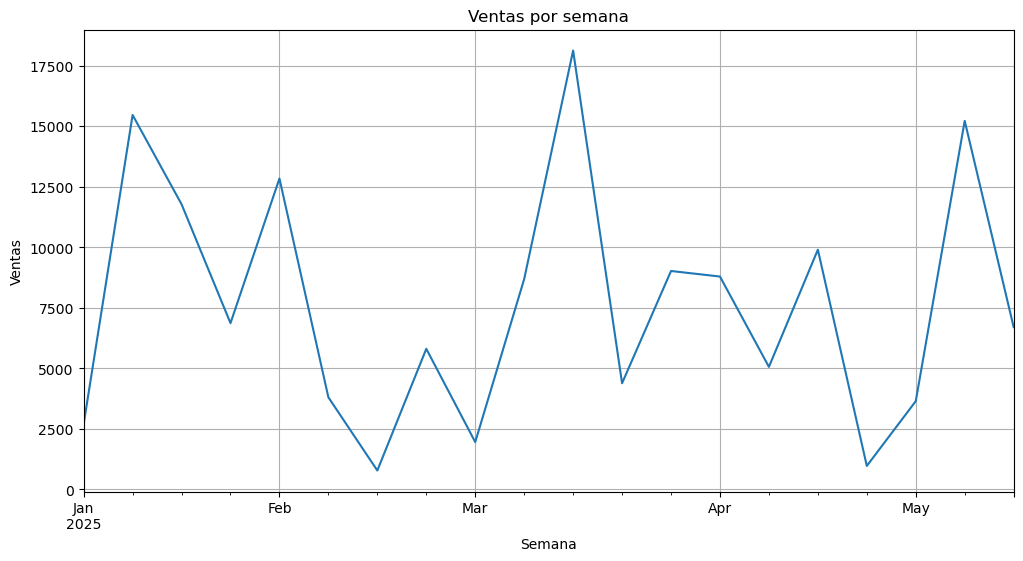

In [28]:
#Estacionalidad por Semana
df_year['semana'] = df_year['fecha'].dt.to_period('W')
ventas_semanales = df_year.groupby('semana')['total'].sum()

ventas_semanales.plot(kind='line', figsize=(12,6))
plt.title('Ventas por semana')
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

C:\Users\ckicu\AppData\Local\Temp\ipykernel_17912\1364723720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compare['año'] = df_compare['fecha'].dt.year
C:\Users\ckicu\AppData\Local\Temp\ipykernel_17912\1364723720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compare['mes'] = df_compare['fecha'].dt.month


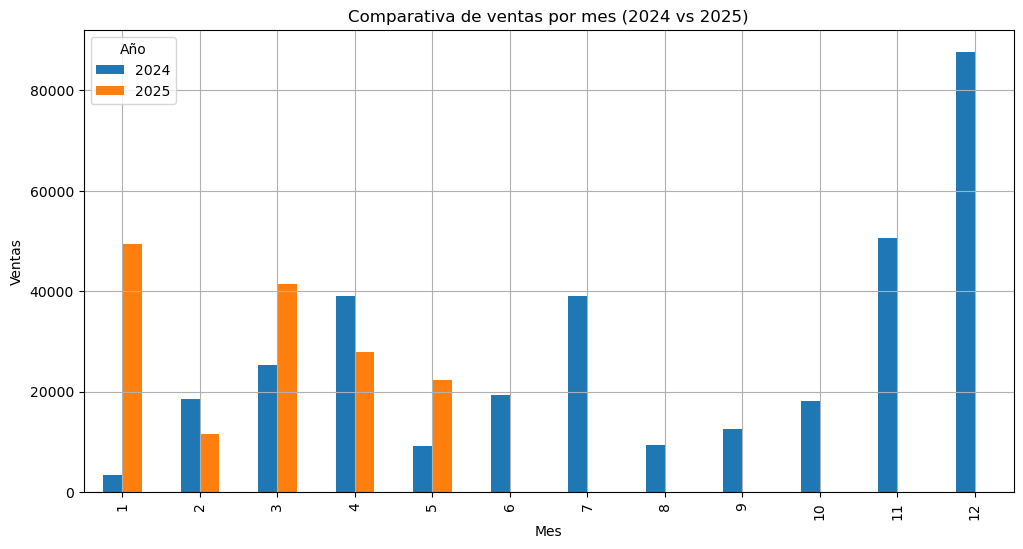

In [34]:
# comparativas entre periodos
df_compare = df[df["fecha"].dt.year >= 2024]


df_compare['año'] = df_compare['fecha'].dt.year
df_compare['mes'] = df_compare['fecha'].dt.month

comparativa = df_compare.groupby(['año', 'mes'])['total'].sum().unstack(level=0)

comparativa.plot(kind='bar', figsize=(12,6))
plt.title('Comparativa de ventas por mes (2024 vs 2025)')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.legend(title='Año')
plt.grid(True)
plt.show()